In [1]:
from common import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

### Read and Format Data Tables

In [2]:
folder = "../algorithm-simulator/out/ramp"
snapshots, activations = read_tables(folder)

### Plot Time-series Metrics

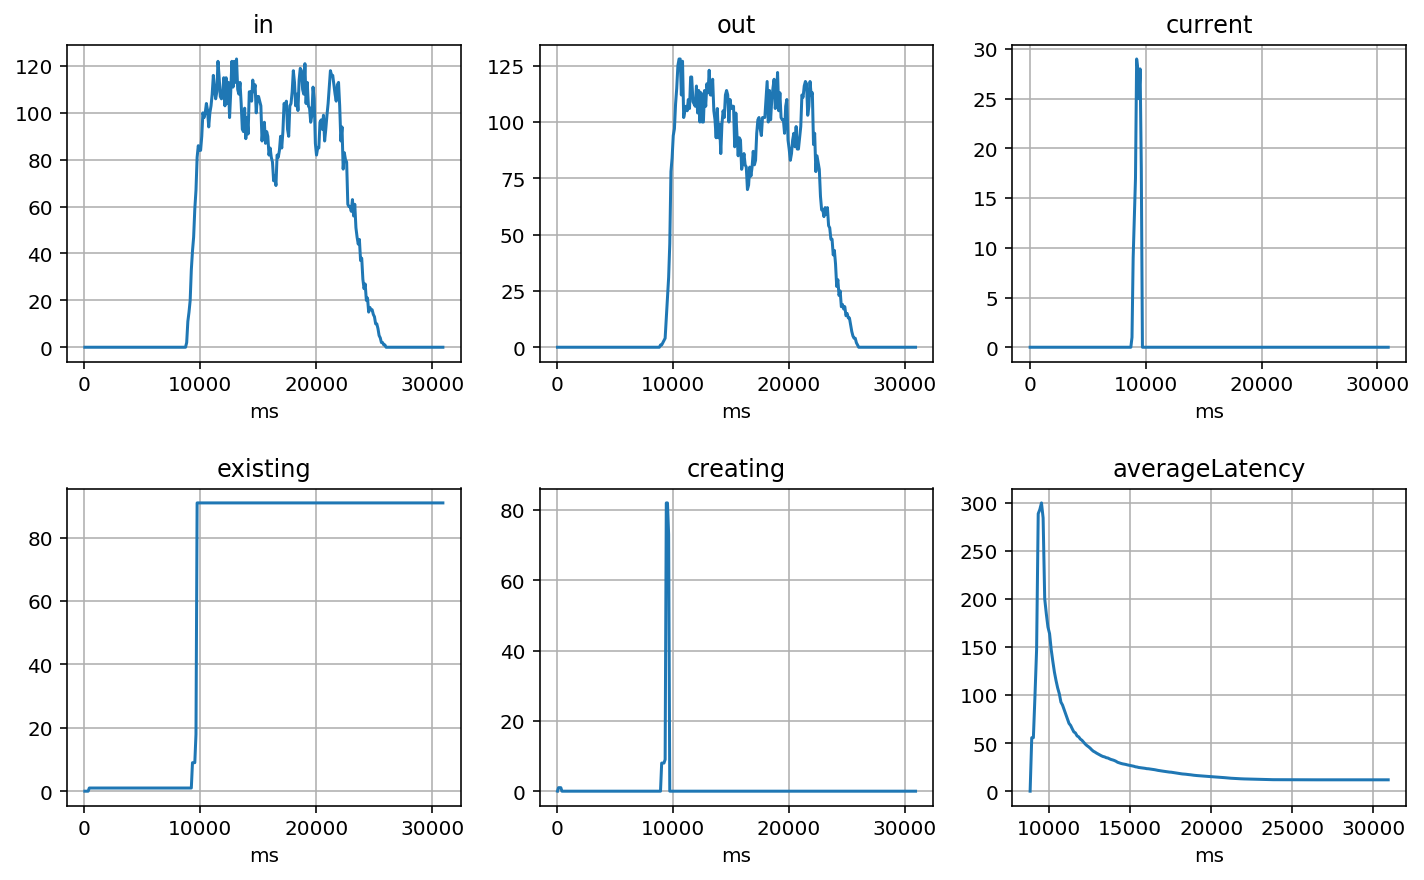

In [3]:
_ = plot_time_series(snapshots)

### Plot Histogram Metrics

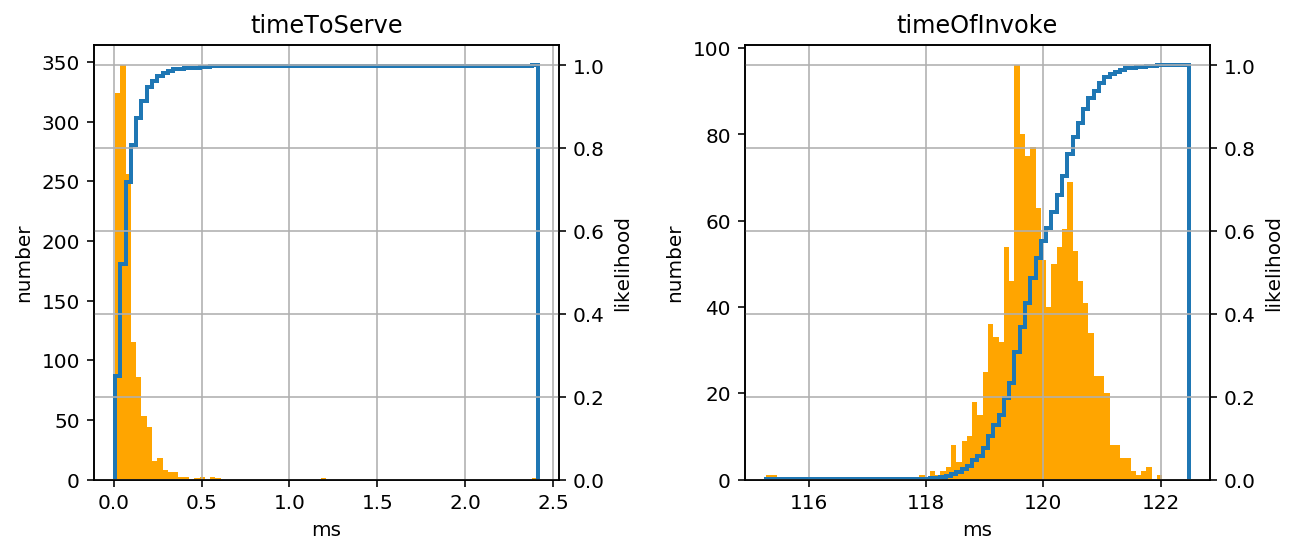

,metric,mean,p90,p95,p99,p99.9
0,timeToServe,12.013547,0.215454,2.413588,330.171988,376.520449
1,timeOfInvoke,131.852311,120.991989,122.482333,449.982405,496.187533


In [4]:
_ = plot_histogram(activations, percentile=95)
distribution_summary(activations)